# GPA Prediction Notebook

In [202]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
# Ignore warnings
warnings.filterwarnings('ignore')
print("Importation complete")

Importation complete


In [203]:
# Load the GPA data from year1_gpa.csv

#data_path = "../Data/year1_gpa.csv"  # Adjust the path as needed
#gpa_data = pd.read_csv(data_path,encoding='latin1')
gpa_data = pd.read_excel('year1_gpa.xlsx')
gpa_data.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'Jamb score', 'English', 'Maths', 'Subject 3',
       'Subject 4', 'Subject 5', 'What was your age in Year One', 'Gender',
       'Do you have a disability?', 'Did you attend extra tutorials? ',
       'How would you rate your participation in extracurricular activities (tech, music, partying, fellowship, etc.) in Year One?',
       'How would you rate your class attendance in Year One',
       'How well did you participate in class activities (Assignments, Asking and Answering Questions, Writing Notes....)',
       'Rate your use of extra materials for study in Year One (Youtube, Other books, others).',
       'Morning', 'Afternoon', 'Evening', 'Late Night',
       'How many days per week did you do reading on average in Year One?',
       'On average, How many hours per day was used for personal study in Year One',
       'Did you teach your peers in Year One',
       'How many courses did you

## Data Preprocessing
In the preprocessing stage, we carefully handle the GPA dataset by addressing missing values, performing feature engineering, and ensuring uniform data formatting to prepare it for accurate model training and prediction.

In [204]:


# Dictionary to map old column names to new names
new_column_names = {
    'ID': 'id',
    'Start time': 'start_time',
    'Completion time': 'completion_time',
    'Email': 'email',
    'Name': 'name',
    'Last modified time': 'last_modified_time',
    'Jamb score': 'jamb_score',
    'English': 'english',
    'Maths': 'maths',
    'Subject 3': 'subject_3',
    'Subject 4': 'subject_4',
    'Subject 5': 'subject_5',
    'What was your age in Year One': 'age_in_year_one',
    'Gender': 'gender',
    'Do you have a disability?': 'has_disability',
    'Did you attend extra tutorials? ': 'attended_tutorials',
    'How would you rate your participation in extracurricular activities (tech, music, partying, fellowship, etc.) in Year One?': 'extracurricular_participation',
    'How would you rate your class attendance in Year One': 'class_attendance_rating',
    'How well did you participate in class activities (Assignments, Asking and Answering Questions, Writing Notes....)': 'class_participation_rating',
    'Did you use extra materials for study in Year One? (Youtube, Other books, others)': 'used_extra_study_materials',
    'Morning': 'morning_study',
    'Afternoon': 'afternoon_study',
    'Evening': 'evening_study',
    'Late Night': 'late_night_study',
    'How many days per week did you do reading on average in Year One?': 'days_per_week_reading',
    'On average, How many hours per day was used for personal study in Year One': 'hours_per_day_personal_study',
    'Did you teach your peers in Year One': 'taught_peers',
    'How many courses did you offer in Year One?': 'courses_offered',
    'Did you fall sick in Year One? if yes, How many times do you remember (0 if none)': 'times_fell_sick',
    'What was your study mode in Year 1': 'study_mode',
    'Did you study the course your originally applied for?': 'studied_original_course',
    'Rate your financial status in Year One': 'financial_status_rating',
    'Rate the teaching style / method of the lectures received in Year One': 'teaching_style_rating',
    'What type of higher institution did you attend in Year One\n': 'institution_type',
    'What was your CGPA in Year One?': 'cgpa_year_one',
    'What grading system does your school use ( if others, type numbers only)': 'grading_system'
}

# Rename columns using the dictionary
gpa_data.rename(columns=new_column_names, inplace=True)

# Print the DataFrame with updated column names
gpa_data


,id,start_time,completion_time,email,name,last_modified_time,jamb_score,english,maths,subject_3,...,taught_peers,courses_offered,times_fell_sick,study_mode,studied_original_course,What was your monthly allowance in Year One?,teaching_style_rating,institution_type,cgpa_year_one,grading_system
0,2,2023-09-30 09:42:21,2023-09-30 09:43:00,anonymous,NaN,NaN,300,B,A,A,...,"Yes, but just a few times",16 to 20,2,Full Time,Yes,NaN,6,Public (Federal),4.83,5
1,3,2023-09-30 10:06:49,2023-09-30 10:12:07,anonymous,NaN,NaN,313,B,A,A,...,"Yes, but just a few times",13 to 16,1,Full Time,Yes,NaN,6,Public (Federal),4.80,5
2,4,2023-10-02 07:00:32,2023-10-02 07:13:14,anonymous,NaN,NaN,249,C,B,B,...,"No, I studied alone",5 to 8,6,Full Time,No,NaN,2,Public (Federal),3.1,5
3,5,2023-10-02 10:47:15,2023-10-02 10:52:56,anonymous,NaN,NaN,213,C,B,B,...,"No, I studied alone",16 to 20,0,Full Time,No,NaN,1,Public (State),3.33,5
4,6,2023-10-02 10:51:42,2023-10-02 10:53:39,anonymous,NaN,NaN,345,C,A,A,...,"Yes, but just a few times",0 to 4,2,Full Time,Yes,NaN,5,Public (Federal),4.6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,128,2023-10-10 11:20:09,2023-10-10 11:24:17,anonymous,NaN,NaN,295,A,C,B,...,"No, I studied alone",9 to 12,0,Full Time,No,11 to 20k,2,Public (Federal),3.27,5
127,129,2023-10-10 15:46:05,2023-10-10 15:50:41,anonymous,NaN,NaN,288,B,A,A,...,"Yes, but just a few times",16 to 20,0,Full Time,Yes,21 to 30k,2,Public (Federal),4.81,5
128,130,2023-10-12 06:59:26,2023-10-12 07:02:08,anonymous,NaN,NaN,316,C,A,B,...,"No, I studied alone",5 to 8,0,Full Time,Yes,11 to 20k,5,Public (Federal),4.66,5
129,131,2023-10-14 12:05:32,2023-10-14 12:08:26,anonymous,NaN,NaN,282,B,A,B,...,"Yes, but just a few times",9 to 12,1,Full Time,Yes,6 to 10k,7,Public (State),4.77,5


In [205]:
# List of columns to drop
columns_to_drop = ['start_time', 'completion_time', 'email', 'name', 'last_modified_time']

# Drop the specified columns
gpa_data.drop(columns=columns_to_drop, inplace=True)

# Print the DataFrame after dropping columns
gpa_data.head()

,id,jamb_score,english,maths,subject_3,subject_4,subject_5,age_in_year_one,gender,has_disability,...,taught_peers,courses_offered,times_fell_sick,study_mode,studied_original_course,What was your monthly allowance in Year One?,teaching_style_rating,institution_type,cgpa_year_one,grading_system
0,2,300,B,A,A,B,B,16,Male,No,...,"Yes, but just a few times",16 to 20,2,Full Time,Yes,NaN,6,Public (Federal),4.83,5
1,3,313,B,A,A,A,B,17,Male,No,...,"Yes, but just a few times",13 to 16,1,Full Time,Yes,NaN,6,Public (Federal),4.80,5
2,4,249,C,B,B,B,C,22,Male,No,...,"No, I studied alone",5 to 8,6,Full Time,No,NaN,2,Public (Federal),3.1,5
3,5,213,C,B,B,C,B,17,Female,No,...,"No, I studied alone",16 to 20,0,Full Time,No,NaN,1,Public (State),3.33,5
4,6,345,C,A,A,A,A,18,Male,No,...,"Yes, but just a few times",0 to 4,2,Full Time,Yes,NaN,5,Public (Federal),4.6,5


In [206]:
#separte columns into numeric and categorical

numerical_cols = []
categorical_cols = []
for i in gpa_data.columns:
    #print(i, gpa_data[i].dtype)
    if gpa_data[i].dtype == 'object':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)

In [207]:
# Cleaning and Transforming the Grading System and CGPA Year One Columns
gpa_data['grading_system'] = gpa_data['grading_system'].replace('A', np.nan)
gpa_data['cgpa_year_one'] = gpa_data['cgpa_year_one'].replace("no idea ", np.nan)
gpa_data['cgpa_year_one'] = gpa_data['cgpa_year_one'].replace("3.o", np.nan)

In [208]:
#convert grading system and cgpa year one to numeric
gpa_data['grading_system'] = pd.to_numeric(gpa_data['grading_system'])
gpa_data['cgpa_year_one'] = pd.to_numeric(gpa_data['cgpa_year_one'])
gpa_data['GPA_normal'] = gpa_data['cgpa_year_one'] / gpa_data['grading_system']

In [209]:
#Prefered study time column
gpa_data['preferred_study_time'] = gpa_data[['morning_study', 'afternoon_study', 'evening_study', 'late_night_study']].idxmax(axis=1)
gpa_data.drop(['morning_study', 'afternoon_study', 'evening_study', 'late_night_study'], axis=1, inplace=True)

### Exploratory Data Analysis

##### Some Insights gotten from the EDA:

+ A greater proportion of first-year students are between 16 and 18, however a younger age does not imply better performance
+ There is a positive relationship between Jamb Score and GPA
+ Generally students who use extra materials perform better than others
+ Students who attend extra tutorials tend to perform better than those who don't
+ Students who have a higher monthly performance tend to perform better than their counterparts

In [210]:
gpa_data.describe()

,id,jamb_score,age_in_year_one,extracurricular_participation,class_attendance_rating,class_participation_rating,"Rate your use of extra materials for study in Year One (Youtube, Other books, others).",days_per_week_reading,hours_per_day_personal_study,times_fell_sick,teaching_style_rating,cgpa_year_one,grading_system,GPA_normal
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,121.000000,131.000000,131.00000,131.000000,131.000000,129.000000,130.000000,128.000000
mean,67.000000,262.305344,17.809160,4.198473,7.259542,6.656489,6.950413,4.072519,4.84542,1.503817,4.480916,4.030186,4.938462,0.820315
std,37.960506,38.704182,1.780728,2.472681,2.661948,2.794971,2.571806,1.826222,3.79213,1.894827,2.054455,0.684602,0.539219,0.135057
min,2.000000,180.000000,14.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.900000,4.000000,0.369000
25%,34.500000,234.000000,17.000000,2.000000,6.000000,4.000000,5.000000,3.000000,2.00000,0.000000,3.000000,3.600000,5.000000,0.741875
50%,67.000000,263.000000,17.000000,4.000000,8.000000,7.000000,7.000000,4.000000,4.00000,1.000000,4.000000,4.230000,5.000000,0.851400
75%,99.500000,291.000000,19.000000,6.000000,9.500000,9.000000,9.000000,6.000000,6.00000,2.000000,6.000000,4.570000,5.000000,0.920000
max,132.000000,372.000000,26.000000,10.000000,10.000000,10.000000,10.000000,7.000000,20.00000,10.000000,10.000000,4.920000,10.000000,1.125000


In [211]:
def univariate_analysis(col):
    '''
    Simple Bar plot for univariate analysis
    '''

    gpa_data[col].value_counts().sort_values().plot(kind='bar')
    plt.title(col.upper())
    plt.show()

In [212]:
def bivariate_analysis(col):
    '''
    Simple Bar plot for bivariate analysis with the targest variable
    '''
    gpa_data.groupby(col)['GPA_normal'].mean().sort_values().plot(kind='bar')
    plt.title(col.upper())
    plt.ylabel("GPA normal")
    plt.show()

0.4459306394589498


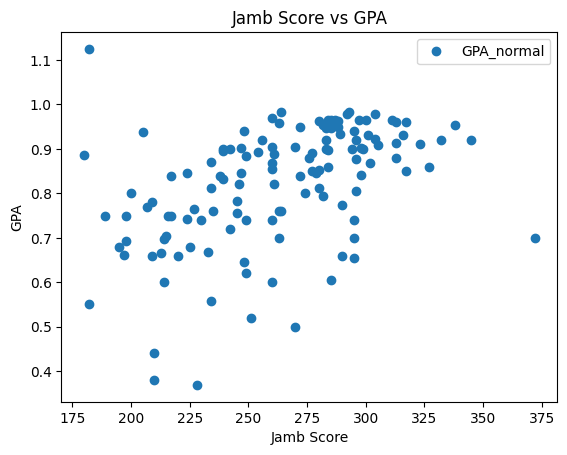

In [213]:
#correlation between jamb score and gpa
correlation = gpa_data['jamb_score'].corr(gpa_data['GPA_normal'])
print (correlation)
gpa_data.plot(x='jamb_score', y='GPA_normal', style='o')
plt.title('Jamb Score vs GPA')
plt.xlabel('Jamb Score')
plt.ylabel('GPA')
plt.show()

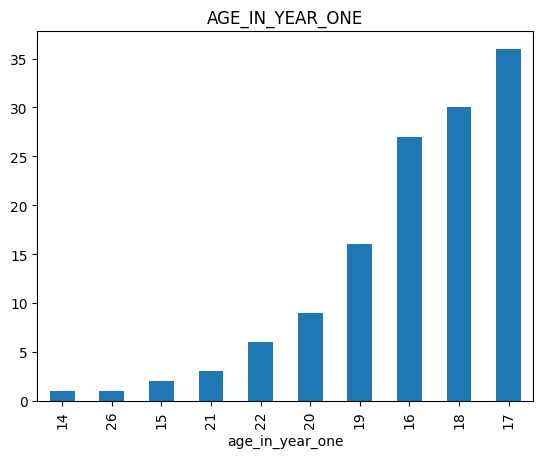

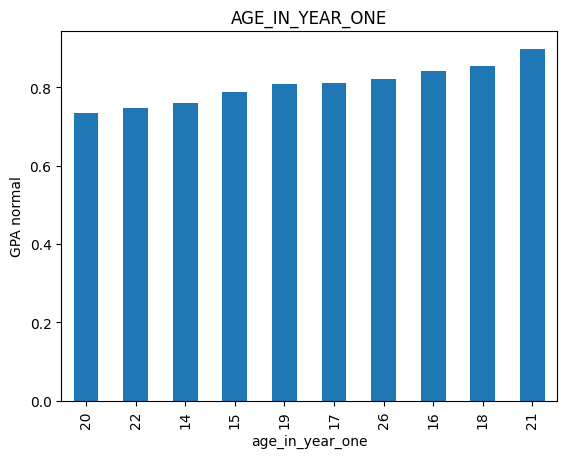

In [214]:
univariate_analysis('age_in_year_one')
bivariate_analysis('age_in_year_one')

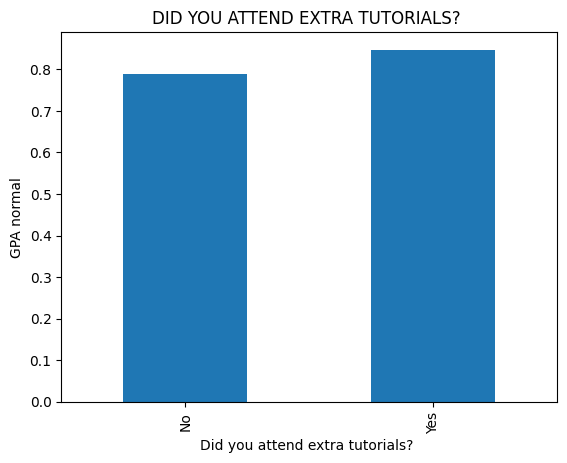

In [215]:
bivariate_analysis('Did you attend extra tutorials?\xa0')

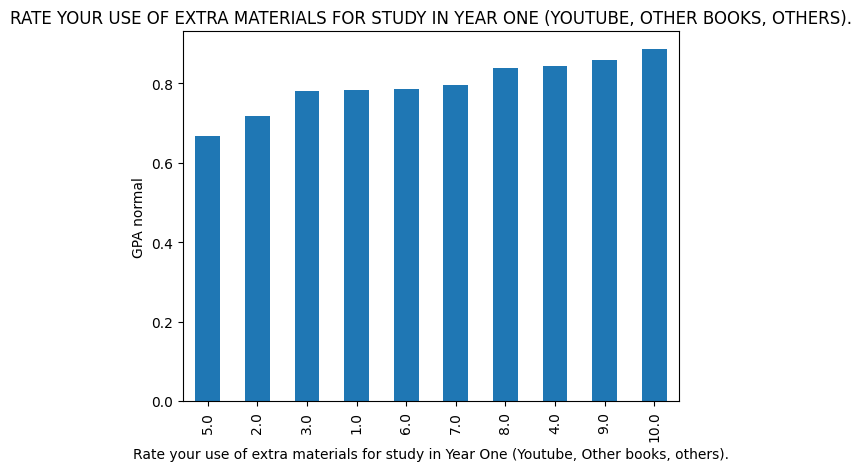

In [216]:
bivariate_analysis('Rate\xa0your use of extra materials for study in Year One (Youtube, Other books, others).')

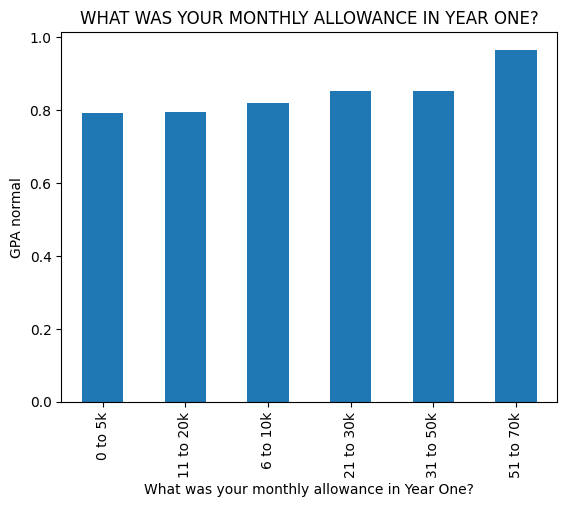

In [217]:
bivariate_analysis('What was your monthly allowance in Year One?')

#### Label Encoding

In [218]:
# Ordinal encoding map
ordinal_encoding_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1, 'F': 0}

# Features to encode
features_to_encode = ['english', 'maths', 'subject_3', 'subject_4', 'subject_5']

# Apply ordinal encoding for the specified features
gpa_data[features_to_encode] = gpa_data[features_to_encode].apply(lambda col: col.map(ordinal_encoding_map))

# Perform label encoding for other categorical columns
categorical_columns = gpa_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    gpa_data[col] = label_encoder.fit_transform(gpa_data[col])

# Print the DataFrame after engineering
gpa_data


,id,jamb_score,english,maths,subject_3,subject_4,subject_5,age_in_year_one,gender,has_disability,...,times_fell_sick,study_mode,studied_original_course,What was your monthly allowance in Year One?,teaching_style_rating,institution_type,cgpa_year_one,grading_system,GPA_normal,preferred_study_time
0,2,300,4,5,5,4,4,16,1,0,...,2,0,1,6,6,1,4.83,5.0,0.966,0
1,3,313,4,5,5,5,4,17,1,0,...,1,0,1,6,6,1,4.80,5.0,0.960,1
2,4,249,3,4,4,4,3,22,1,0,...,6,0,0,6,2,1,3.10,5.0,0.620,1
3,5,213,3,4,4,3,4,17,0,0,...,0,0,0,6,1,2,3.33,5.0,0.666,3
4,6,345,3,5,5,5,5,18,1,0,...,2,0,1,6,5,1,4.60,5.0,0.920,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,128,295,5,3,4,4,3,17,0,0,...,0,0,0,1,2,1,3.27,5.0,0.654,3
127,129,288,4,5,5,5,5,18,0,0,...,0,0,1,2,2,1,4.81,5.0,0.962,2
128,130,316,3,5,4,4,4,16,1,0,...,0,0,1,1,5,1,4.66,5.0,0.932,2
129,131,282,4,5,4,4,5,18,1,0,...,1,0,1,5,7,2,4.77,5.0,0.954,1


In [219]:
#create an average score for the five subjects
gpa_data['avg_subject_score'] = gpa_data[['english', 'maths', 'subject_3', 'subject_4', 'subject_5']].mean(axis=1)
gpa_data.drop(['english', 'maths', 'subject_3', 'subject_4', 'subject_5'], axis=1, inplace=True)

In [220]:
#Based on Bivariate Analysis, the following do not have a significant relationship with the target variable and are dropped

gpa_data.drop([
    'has_disability',
    'courses_offered',
    'times_fell_sick',
    'study_mode',
    'studied_original_course',
    'gender'
], axis=1, inplace=True)

In [221]:
gpa_data.drop(['cgpa_year_one', 'grading_system'], axis=1, inplace=True)
gpa_data.dropna(inplace=True)

In [222]:
gpa_data.head()

,id,jamb_score,age_in_year_one,Did you attend extra tutorials?,extracurricular_participation,class_attendance_rating,class_participation_rating,"Rate your use of extra materials for study in Year One (Youtube, Other books, others).",days_per_week_reading,hours_per_day_personal_study,taught_peers,What was your monthly allowance in Year One?,teaching_style_rating,institution_type,GPA_normal,preferred_study_time,avg_subject_score
10,12,245,20,1,5,7,8,10.0,7.0,6.0,1,5,5,1,0.756,3,4.0
11,13,245,18,0,1,1,5,4.0,4.0,3.0,3,5,1,2,0.782,3,3.2
12,14,288,22,0,6,10,10,7.0,7.0,1.0,3,0,8,1,0.950,3,3.8
13,15,260,16,0,2,6,4,3.0,2.0,5.0,3,5,4,1,0.854,2,3.2
14,16,209,18,0,7,6,2,4.0,2.0,1.0,3,0,4,2,0.780,3,3.0


## Machine Learning Modeling

In this section, we will walk through the steps involved in building and evaluating a machine learning model for our GPA prediction task.


In [223]:
X = gpa_data.drop(['id', 'GPA_normal'], axis=1)  # Features excluding 'id' and 'GPA_normal'
y = gpa_data['GPA_normal']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [224]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [225]:
model = RandomForestRegressor(random_state = 0).fit(X_train,y_train)
y_pred = model.predict(X_test)

### Model Evaluation

In [226]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)
mae = mean_absolute_error(y_test, y_pred)
print ('Mean Absolute Error (MAE):', mae)

Root Mean Squared Error (RMSE): 0.10789773928933817
Mean Absolute Error (MAE): 0.08104124999999995


In [227]:
error = abs(y_test - y_pred)
rmse = np.sqrt(np.mean(np.square(error)))
accuracy_table = pd.DataFrame({'Actual Values': np.round(y_test,2), 'Predicted Values': np.round(y_pred,2), 'Absolute Error': np.round(error,2)})
accuracy_table

,Actual Values,Predicted Values,Absolute Error
66,0.93,0.84,0.10
102,0.85,0.79,0.05
14,0.78,0.63,0.15
55,0.77,0.73,0.04
36,0.74,0.68,0.06
129,0.95,0.87,0.08
80,0.88,0.89,0.01
20,0.76,0.74,0.02
103,0.68,0.77,0.09
84,0.97,0.83,0.14


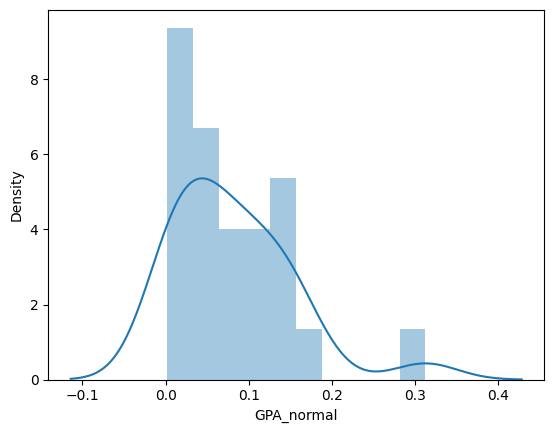

In [228]:
sns.distplot(error, bins=10);
#A good model will have an approximately normal distribution.

### Save the model

In [229]:
# Save the model to a file
model_filename = 'regression_model.joblib'
joblib.dump(model, model_filename)

print('Model saved to', model_filename)

Model saved to regression_model.joblib
